https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

In [1]:
from io import open
import glob
import os

In [2]:
!unzip data.zip

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/eng-fra.txt        
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [3]:
def findFiles(path: str) -> list[str]:
    return glob.glob(path)

In [4]:
print(findFiles('data/names/*.txt'))

['data/names/Portuguese.txt', 'data/names/Polish.txt', 'data/names/Scottish.txt', 'data/names/Czech.txt', 'data/names/German.txt', 'data/names/Chinese.txt', 'data/names/Italian.txt', 'data/names/Russian.txt', 'data/names/Arabic.txt', 'data/names/French.txt', 'data/names/Vietnamese.txt', 'data/names/English.txt', 'data/names/Dutch.txt', 'data/names/Irish.txt', 'data/names/Japanese.txt', 'data/names/Korean.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt']


In [5]:
import unicodedata
import string

In [6]:
all_letters = string.ascii_letters + " .,;'"

In [7]:
n_letters = len(all_letters)

In [8]:
n_letters

57

In [9]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [10]:
def unicodeToAscii(s: str) -> str:
    return ''.join(
        c for c in unicodedata.normalize('NFD',s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [11]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [12]:
category_lines = {} # A list of names per language
all_categories = []

In [13]:
def readLines(filename: str) -> list[str]:
    lines = open(filename, encoding = 'utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [14]:
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0] # Return filename without extension
    all_categories.append(category)
    lines = readLines(filename) # Return a list of strings for this language
    category_lines[category] = lines

n_categories = len(all_categories)

In [15]:
category_lines

{'Portuguese': ['Abreu',
  'Albuquerque',
  'Almeida',
  'Alves',
  'Araujo',
  'Araullo',
  'Barros',
  'Basurto',
  'Belo',
  'Cabral',
  'Campos',
  'Cardozo',
  'Castro',
  'Coelho',
  'Costa',
  'Crespo',
  'Cruz',
  "D'cruz",
  "D'cruze",
  'Delgado',
  'De santigo',
  'Duarte',
  'Esteves',
  'Fernandes',
  'Ferreira',
  'Ferreiro',
  'Ferro',
  'Fonseca',
  'Franco',
  'Freitas',
  'Garcia',
  'Gaspar',
  'Gomes',
  'Gouveia',
  'Guerra',
  'Henriques',
  'Lobo',
  'Machado',
  'Madeira',
  'Magalhaes',
  'Maria',
  'Mata',
  'Mateus',
  'Matos',
  'Medeiros',
  'Melo',
  'Mendes',
  'Moreno',
  'Nunes',
  'Palmeiro',
  'Paredes',
  'Pereira',
  'Pinheiro',
  'Pinho',
  'Ramires',
  'Ribeiro',
  'Rios',
  'Rocha',
  'Rodrigues',
  'Romao',
  'Rosario',
  'Salazar',
  'Santana',
  'Santiago',
  'Santos',
  'Serafim',
  'Silva',
  'Silveira',
  'Simoes',
  'Soares',
  'Souza',
  'Torres',
  'Vargas',
  'Ventura'],
 'Polish': ['Adamczak',
  'Adamczyk',
  'Andrysiak',
  'Auttenberg

In [16]:
all_categories

['Portuguese',
 'Polish',
 'Scottish',
 'Czech',
 'German',
 'Chinese',
 'Italian',
 'Russian',
 'Arabic',
 'French',
 'Vietnamese',
 'English',
 'Dutch',
 'Irish',
 'Japanese',
 'Korean',
 'Spanish',
 'Greek']

In [17]:
print(category_lines['Irish'][:5])

['Adam', 'Ahearn', 'Aodh', 'Aodha', 'Aonghuis']


In [18]:
import torch

In [19]:
def letterToIndex(letter: str) -> int:
    return all_letters.find(letter)

In [20]:
def letterToTensor(letter: str) -> torch.Tensor:
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

In [21]:
# Turn a line into a <line_length x 1 x n_letters> Tensor
# or an array of one-hot letter vectors

def lineToTensor(line: str) -> torch.Tensor:
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1

    return tensor

In [22]:
print(letterToTensor('j'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [23]:
print(lineToTensor('Jones'))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [24]:
import torch.nn as nn

In [25]:
class RNN(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input: torch.Tensor, hidden: torch.Tensor):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size).to('cuda')

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [26]:
input_ = letterToTensor('A')
input_

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [27]:
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(input_, hidden)

In [28]:
output

tensor([[-2.9759, -2.8675, -2.8636, -2.8517, -2.9715, -2.9124, -2.8070, -2.9015,
         -2.9436, -2.9025, -2.8652, -2.8701, -2.8442, -2.9002, -2.9135, -2.9030,
         -2.9153, -2.8353]], grad_fn=<LogSoftmaxBackward0>)

In [29]:
input_ = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)
input_

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [30]:
output, next_hidden = rnn(input_[0], hidden)
output

tensor([[-2.9759, -2.8675, -2.8636, -2.8517, -2.9715, -2.9124, -2.8070, -2.9015,
         -2.9436, -2.9025, -2.8652, -2.8701, -2.8442, -2.9002, -2.9135, -2.9030,
         -2.9153, -2.8353]], grad_fn=<LogSoftmaxBackward0>)

In [31]:
def categoryFromOutput(output: torch.Tensor):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [32]:
categoryFromOutput(output)

('Italian', 6)

In [33]:
import random

In [34]:
def randomChoice(l):
    return l[random.randint(0,len(l)-1)]

In [35]:
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype = torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor


In [36]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print(f'Category: {category} | line: {line}')

Category: Greek | line: Protopsaltis
Category: Czech | line: Finke
Category: French | line: Glaisyer
Category: German | line: Kruse
Category: Czech | line: Plisek
Category: Russian | line: Hartukov
Category: Czech | line: Rebka
Category: Scottish | line: Russell
Category: French | line: Tremble
Category: French | line: Larue


In [37]:
criterion = nn.NLLLoss()

In [38]:
lr = 5e-3

def train(model, category_tensor: torch.Tensor, line_tensor: torch.Tensor) -> tuple[torch.Tensor, float]:
    hidden = model.initHidden()
    model.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Gradient descent step:
    for p in model.parameters():
        p.data.add_(p.grad.data, alpha = -lr)

    return output, loss.item()

In [39]:
import time
import math

n_iters = 250000
print_every = 5000
plot_every = 1000

# keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60

    return '%dm %ds' %(m,s)

In [40]:
start = time.time()
rnn = rnn.to('cuda')

for iter in range(1, n_iters+1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(rnn, category_tensor.to('cuda'),
                         line_tensor.to('cuda'))
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 2% (0m 11s) 2.8238 Bateman / Russian ✗ (English)
10000 4% (0m 24s) 2.2506 Fernandes / Dutch ✗ (Portuguese)
15000 6% (0m 35s) 0.2662 Ichisada / Japanese ✓
20000 8% (0m 46s) 1.5874 Nascimbene / Italian ✓
25000 10% (0m 58s) 1.1253 Grillo / Spanish ✗ (Italian)
30000 12% (1m 9s) 0.5311 Macleod / Scottish ✓
35000 14% (1m 20s) 0.2020 Than / Vietnamese ✓
40000 16% (1m 31s) 1.3058 Phung / Chinese ✗ (Vietnamese)
45000 18% (1m 42s) 1.9810 Platts / Portuguese ✗ (English)
50000 20% (1m 54s) 2.3184 Solomon / English ✗ (French)
55000 22% (2m 5s) 2.4206 Dupond / Scottish ✗ (French)
60000 24% (2m 17s) 0.6957 Vargas / Portuguese ✓
65000 26% (2m 28s) 0.2690 Petrakis / Greek ✓
70000 28% (2m 39s) 0.3973 Torres / Portuguese ✓
75000 30% (2m 51s) 4.4834 Jelen / Dutch ✗ (Polish)
80000 32% (3m 2s) 0.1695 Miao / Chinese ✓
85000 34% (3m 13s) 0.5749 Sanchez / Spanish ✓
90000 36% (3m 24s) 0.0969 Ryoo / Korean ✓
95000 38% (3m 36s) 0.8327 Joe / Korean ✗ (Chinese)
100000 40% (3m 48s) 0.0057 Jeldakov / Russian ✓
1

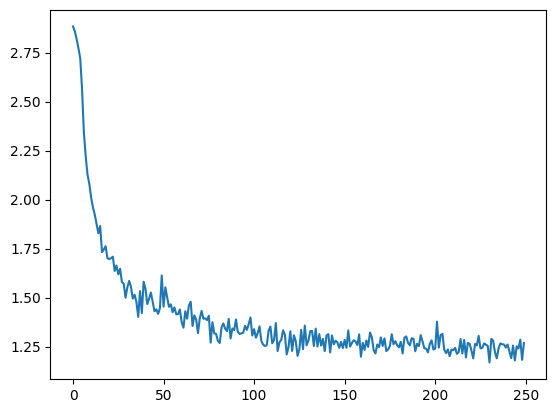

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [42]:
conf = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(model, line_tensor: torch.Tensor):
    hidden = model.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    return output

In [43]:
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(rnn, line_tensor.to('cuda'))
    guess, guess_i = categoryFromOutput(output)
    cat_i = all_categories.index(category)
    conf[cat_i][guess_i] += 1

In [44]:
for i in range(n_categories):
    conf[i] = conf[i]/conf[i].sum()

In [45]:
conf

tensor([[0.5777, 0.0091, 0.0000, 0.0329, 0.0000, 0.0000, 0.0475, 0.0000, 0.0969,
         0.0146, 0.0000, 0.0128, 0.0219, 0.0000, 0.0146, 0.0000, 0.1389, 0.0329],
        [0.0000, 0.8179, 0.0196, 0.0357, 0.0196, 0.0000, 0.0000, 0.0000, 0.0071,
         0.0071, 0.0000, 0.0321, 0.0000, 0.0143, 0.0321, 0.0125, 0.0018, 0.0000],
        [0.0000, 0.0095, 0.6919, 0.0000, 0.0397, 0.0189, 0.0000, 0.0000, 0.0756,
         0.0151, 0.0000, 0.0473, 0.0113, 0.0643, 0.0000, 0.0000, 0.0038, 0.0227],
        [0.0175, 0.2035, 0.0316, 0.3053, 0.0807, 0.0000, 0.0053, 0.0070, 0.0544,
         0.0193, 0.0088, 0.0544, 0.0456, 0.0263, 0.0404, 0.0000, 0.0807, 0.0193],
        [0.0071, 0.0671, 0.1025, 0.0618, 0.4064, 0.0124, 0.0053, 0.0071, 0.0760,
         0.0512, 0.0053, 0.0636, 0.0654, 0.0194, 0.0124, 0.0124, 0.0141, 0.0106],
        [0.0052, 0.0069, 0.0241, 0.0000, 0.0052, 0.4622, 0.0034, 0.0000, 0.0000,
         0.0000, 0.1735, 0.0052, 0.0137, 0.0086, 0.0155, 0.2766, 0.0000, 0.0000],
        [0.0614, 0.008

<ipython-input-46-9f5e648e1d30>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-46-9f5e648e1d30>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


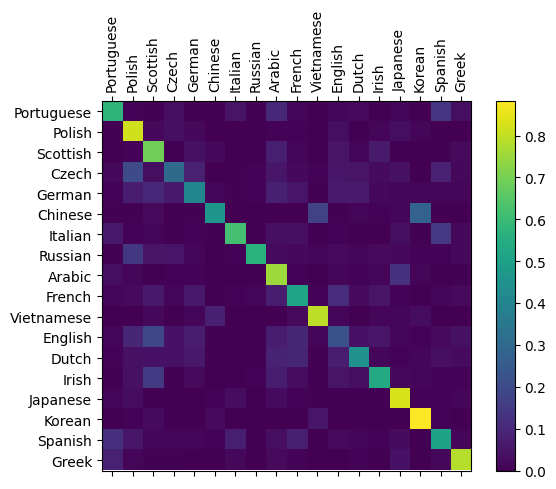

In [46]:
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [47]:
def predict(input_line, n_predictions = 3):
    print(f'\n> {input_line}')
    with torch.no_grad():
        output = evaluate(rnn, lineToTensor(input_line).to('cuda'))

        # Get top N cats
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            cat_idx = topi[0][i].item()
            print(f'{value:.2f} {all_categories[cat_idx]}')
            predictions.append([value, all_categories[cat_idx]])

In [48]:
predict('Andrew')


> Andrew
-1.10 English
-1.60 Spanish
-1.97 Dutch


In [49]:
predict('Ben')


> Ben
-0.57 Vietnamese
-1.63 Chinese
-2.06 Korean


In [50]:
predict('Benjamin')


> Benjamin
-0.34 Dutch
-2.25 German
-2.40 French


In [51]:
predict('Cooke')


> Cooke
-1.26 Greek
-1.31 Japanese
-1.75 English


In [52]:
predict('Sean')


> Sean
-0.50 Chinese
-1.47 Korean
-3.13 Irish
